# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

In [11]:
model = keras.Sequential()

In [12]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [13]:
model.add(keras.layers.MaxPooling2D(2))

In [14]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(50, activation='relu'))  # 새로운 은닉층 추가
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               627300    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                      

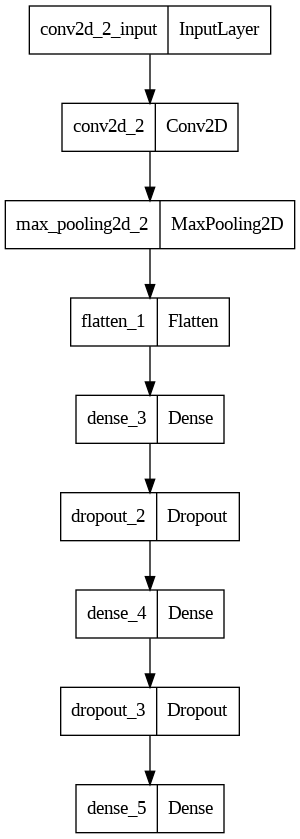

In [16]:
keras.utils.plot_model(model)

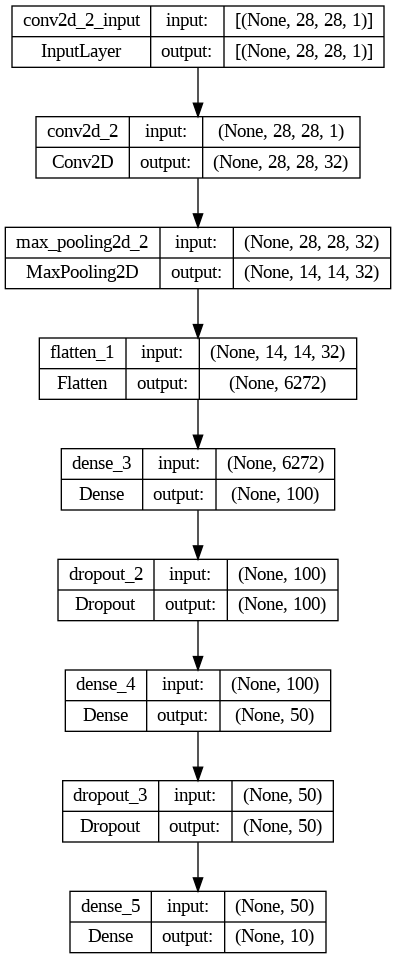

In [17]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 44s 28ms/step - loss: 0.6896 - accuracy: 0.7527 - val_loss: 0.3636 - val_accuracy: 0.8701
Epoch 2/20
   7/1500 [..............................] - ETA: 28s - loss: 0.4650 - accuracy: 0.8080

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 36s 24ms/step - loss: 0.4483 - accuracy: 0.8470 - val_loss: 0.3139 - val_accuracy: 0.8856
Epoch 3/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.3884 - accuracy: 0.8650 - val_loss: 0.2994 - val_accuracy: 0.8915
Epoch 4/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.3556 - accuracy: 0.8767 - val_loss: 0.2876 - val_accuracy: 0.8957
Epoch 5/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3354 - accuracy: 0.8840 - val_loss: 0.2843 - val_accuracy: 0.8999
Epoch 6/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3109 - accuracy: 0.8910 - val_loss: 0.2767 - val_accuracy: 0.9000
Epoch 7/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2986 - accuracy: 0.8947 - val_loss: 0.2754 - val_accuracy: 0.9036
Epoch 8/20
1500/1500 [==============================] - 41s 28ms/step - loss: 0.2837 - accuracy: 0.9011 - val_loss: 0.2710 - val_accura

In [19]:
import matplotlib.pyplot as plt

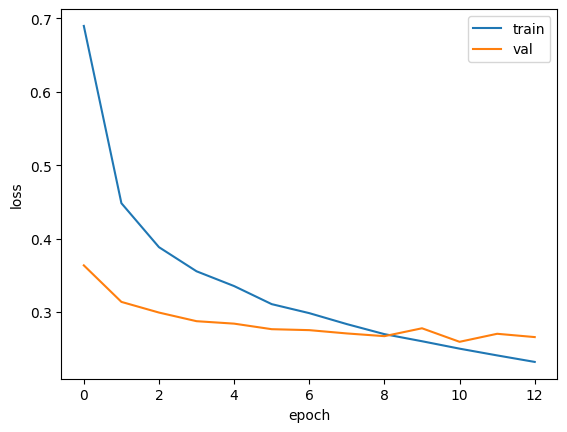

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2596 - accuracy: 0.9122


[0.2595679461956024, 0.9122499823570251]

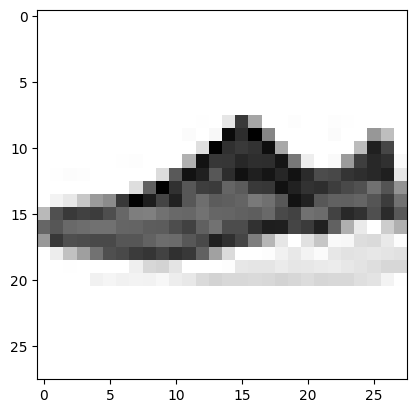

In [44]:
import numpy as np

# 스니커즈를 찾아서 교체하는 부분
sneaker_index = np.where(val_target == 7)[0][0]
sneaker_image = val_scaled[sneaker_index]

val_scaled[0] = sneaker_image

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()


In [45]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 51ms/step
[[3.2435496e-16 1.3057121e-16 8.3644747e-19 4.8865868e-21 4.5252386e-20
  2.2908660e-07 1.6423125e-20 9.9999881e-01 5.7464542e-16 9.7940733e-07]]


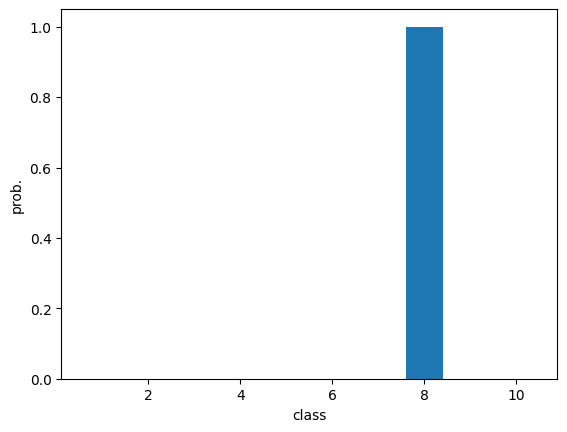

In [46]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [47]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [50]:
print(np.argmax(preds))

7


In [49]:
print(classes[np.argmax(preds)])

스니커즈


In [51]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [52]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2775 - accuracy: 0.9070


[0.2775196135044098, 0.9070000052452087]